In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [120]:
#Import main dataframe 
df = pd.read_csv('data/temp/movie_complete_df.csv.gz', compression='gzip')
df['date'] = pd.to_datetime(df['date'])
df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45519 entries, 0 to 45518
Data columns (total 30 columns):
adult                45519 non-null bool
budget               45519 non-null int64
kaggle_id            45519 non-null int64
imdb_id              45519 non-null object
original_language    45508 non-null object
original_title       45519 non-null object
overview             44567 non-null object
popularity           45519 non-null float64
date                 45519 non-null datetime64[ns]
revenue              45519 non-null float64
runtime              45264 non-null float64
status               45438 non-null object
tagline              20435 non-null object
title                45519 non-null object
video                45519 non-null bool
vote_avg             45519 non-null float64
vote_count           45519 non-null float64
GENRES               45519 non-null object
COLLECTION           4497 non-null object
LANGUAGES            45519 non-null object
PRODUCER             4551

In [105]:
#Reassigning zero values for budget and revenue into a negative value for easy filtering

def budget_no_zero(value):
    if value > 0:
        return value
    else:
        return -2

def revenue_no_zero(value):
    if value > 0:
        return value
    else:
        return -1

df['BUDGET_MIL'] = df['BUDGET_MIL'].apply(budget_no_zero)
df['REVENUE_MIL'] = df['REVENUE_MIL'].apply(revenue_no_zero)
    


In [119]:
# df['PROFIT'] = ((df['REVENUE_MIL'] - df['BUDGET_MIL'])* df['REVENUE_MIL'])/(df['BUDGET_MIL']**2)
# df['PROFIT'] = df['PROFIT']/10**14
df['PROFIT'] = df['REVENUE_MIL']/df['BUDGET_MIL']
df['PROFIT'].describe()

count    4.551900e+04
mean    -1.605700e+00
std      7.755773e+04
min     -1.000000e+06
25%      5.000000e-01
50%      5.000000e-01
75%      5.000000e-01
max      1.239638e+07
Name: PROFIT, dtype: float64

Text(0, 0.5, 'Revenue in $million')

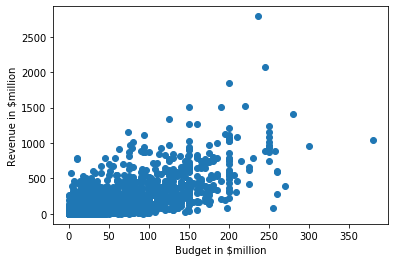

In [37]:
plt.scatter(df.BUDGET_MIL, df.REVENUE_MIL);

plt.xlabel('Budget in $million')
plt.ylabel('Revenue in $million')
# df_money.PROFIT.value_counts()

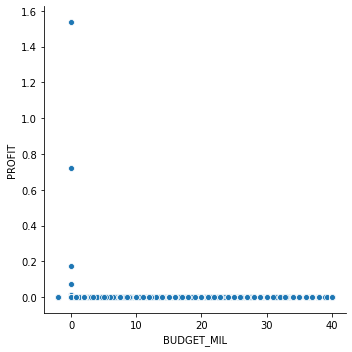

In [117]:
dftemp = df[df['BUDGET_MIL'] <= 40]
sns.relplot(x="BUDGET_MIL", y="PROFIT", data=dftemp);

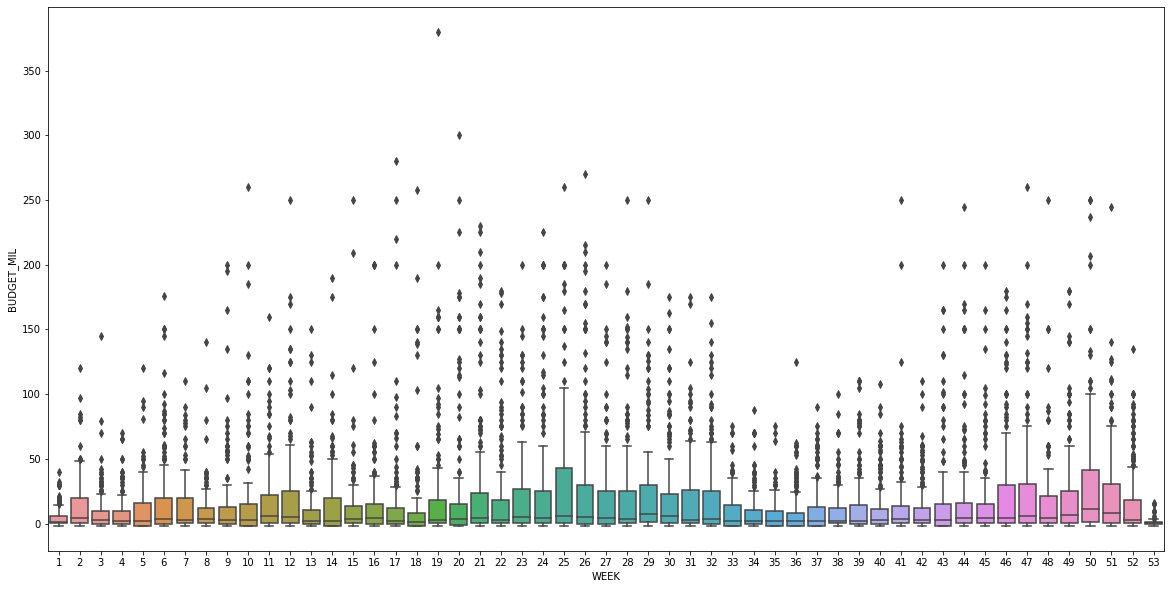

In [112]:


dftemp = df[df['PROFIT'] > 0]
plt.figure(figsize=(20,10))
sns.boxplot(x="WEEK", y="BUDGET_MIL",data=dftemp );

In [98]:
df_lang = df.loc[(df['original_language'] == 'en') | (df['original_language'] == 'fr')]

In [ ]:
sns.relplot(x="BUDGET_MIL", y="REVENUE_MIL", hue='WEEK', data=df_lang);